# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

<hr>

### Tim Gormly:
### 4/14/2024

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

<hr>

## Import Libraries

In [85]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

from spacytextblob.spacytextblob import SpacyTextBlob

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
colorama           0.4.6
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.51.0
html5lib           1.1
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
joblib             1.4.0
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
nltk               3.8.1
numpy   

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [86]:
#Tim Gormly - 4/14/2024

article_page = requests.get('https://www.stltoday.com/sports/professional/nhl/blues/blues-eliminated-from-postseason-contention-after-loss-to-carolina-how-can-t-you-be-disappointed/article_3f3905d8-f906-11ee-9a10-6fabd0f9da8c.html')
article_html = article_page.text
# print(response.status_code)
# print(response.headers['content-type'])

# Uncomment to check for errors
# parser = 'html5lib'
# soup = BeautifulSoup(article_html, parser)
# print(soup.prettify())

# write article html to pkl file
with open('blues_eliminated.pkl', 'wb') as f:
    pickle.dump(article_html, f)

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [87]:
# Tim Gormly - 4/14/2024

# Load HTML
with open('blues_eliminated.pkl', 'rb') as f:
    article_html = pickle.load(f)

# Use BeautifulSoup to parse HTML content
soup = BeautifulSoup(article_html, 'html.parser')

# Find all elements with class="lee-article-text"
article_texts = soup.find_all(class_="lee-article-text")

# Extract text from each element
text = ''
for article_text in article_texts:
    text += article_text.get_text() + '\n'  # Add a newline between each article text
# print(text)

# prepare spaCy nlp model
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# process text with spaCy
doc = nlp(text)

# Sentiment Analysis
polarity_score = doc._.polarity

# number of sentences
num_sentences = len(list(doc.sents))

# Print results
print("Article Polarity Score:", polarity_score)
print("Number of Sentences:", num_sentences)


Article Polarity Score: 0.08565217391304347
Number of Sentences: 63


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [88]:

# remove whitespace, stopwords, and punctuation:
filtered_tokens = [token.text for token in doc if token.text.strip() and not token.is_stop and not token.is_punct]

# convert tokens to lowercase
lowercase_tokens = [token.lower() for token in filtered_tokens]

# Count frequency of each token
token_counts = Counter(lowercase_tokens)

# Find 5 most common tokens
top5_tokens = token_counts.most_common(5) # most_common() is a method from the Counter object

# Show top 5 tokens with their frequency:
print("Top 5 Tokens:")
for token, frequency in top5_tokens:
    print(f"{token}: {frequency}")

# Show all tokens and their frequency:
print("\nAll Tokens with Frequency:")
for token, frequency in token_counts.items():
    print(f"{token}: {frequency}")

Top 5 Tokens:
blues: 13
games: 9
season: 9
st.: 8
game: 8

All Tokens with Frequency:
listen: 1
subscribe: 1
apple: 1
podcasts: 1
|: 1
spotify: 1
tiny: 2
cuts: 2
shrewdly: 1
shredded: 1
deftly: 1
diced: 1
80: 2
games: 9
season: 9
finally: 1
killed: 1
blues: 13
accumulated: 1
losses: 2
different: 1
head: 2
coaches: 1
added: 1
despite: 1
best: 3
goaltending: 2
league: 2
dotted: 1
inconsistent: 1
transition: 1
turned: 1
exactly: 2
organization: 1
thought: 2
5: 1
2: 3
loss: 1
carolina: 1
friday: 2
night: 2
combined: 1
vegas: 1
win: 4
minnesota: 2
officially: 1
eliminated: 1
postseason: 3
contention: 1
disappointed: 1
interim: 1
coach: 1
drew: 1
bannister: 5
said: 5
start: 1
training: 1
camp: 1
september: 1
lot: 5
guys: 2
earlier: 1
practices: 1
travel: 1
battle: 2
point: 1
ripped: 1
away: 3
people: 1
reading: 1
ian: 1
froeb: 1
stl: 1
100: 2
st.: 8
louis: 7
restaurants: 1
2024: 1
gordon: 1
ramsay: 1
opens: 1
restaurant: 1
seasons: 3
hotel: 2
april: 1
17: 1
at&t: 1
tower: 1
downtown: 1
sold:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [89]:
# Remove whitespace, punctuation and stopwards
# lemmatize the remaining tokens
filtered_lemmas = [token.lemma_.lower() for token in doc if token.text.strip() and not token.is_stop and not token.is_punct]


# Use Counter to find the frequency of each lemma
lemma_counts = Counter(filtered_lemmas)


# Find top 5 lemmas
top5_lemmas = lemma_counts.most_common(5)

# Print top 5 with frequency:
print('Top 5 Lemmas:')
for lemma, frequency in top5_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas and their frequencies
print("\nLemmas and Their Frequencies:")
for lemma, frequency in lemma_counts.items():
    print(f"{lemma}: {frequency}")

Top 5 Lemmas:
game: 17
blues: 12
season: 11
good: 10
playoff: 9

Lemmas and Their Frequencies:
listen: 1
subscribe: 1
apple: 1
podcasts: 1
|: 1
spotify: 1
tiny: 2
cut: 3
shrewdly: 1
shred: 1
deftly: 1
dice: 1
80: 2
game: 17
season: 11
finally: 1
kill: 1
blues: 12
accumulate: 1
loss: 3
different: 1
head: 2
coach: 2
add: 1
despite: 1
good: 10
goaltending: 1
league: 2
dot: 1
inconsistent: 1
transition: 1
turn: 1
exactly: 2
organization: 1
think: 7
5: 1
2: 3
carolina: 1
friday: 2
night: 2
combine: 1
vegas: 1
win: 7
minnesota: 2
officially: 1
eliminate: 1
postseason: 3
contention: 1
disappoint: 1
blue: 1
interim: 1
drew: 1
bannister: 5
say: 5
start: 1
training: 1
camp: 1
september: 1
lot: 5
guy: 2
early: 1
practice: 1
travel: 1
battle: 2
point: 5
rip: 1
away: 3
people: 1
read: 1
ian: 1
froeb: 1
stl: 1
100: 2
st.: 8
louis: 7
restaurant: 2
2024: 1
gordon: 1
ramsay: 1
open: 1
seasons: 1
hotel: 2
april: 1
17: 1
at&t: 1
tower: 1
downtown: 1
sell: 1
boston: 1
firm: 1
scientist: 1
want: 2
know: 2


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

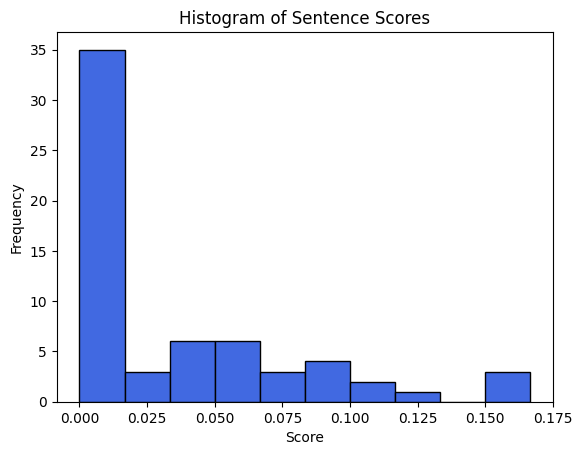

In [90]:
from article_summarizer_methods import score_sentence_by_token

# create set of interesting tokens
interesting_tokens = set()
for token, freq in top5_tokens:
    interesting_tokens.add(token)

# create list of sentences
sentences = list(doc.sents)

# create empty list of scores
scores = []

for sentence in sentences:
    scores.append(score_sentence_by_token(sentence, interesting_tokens))
    
plt.hist(scores, color='royalblue', edgecolor='black')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Scores')

# display histogram
plt.show()

# Most common range of scores:
# A score range of 0-0.050 seems to have the vast majority of instances. A score of 0 is the the most common score, by a lot.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

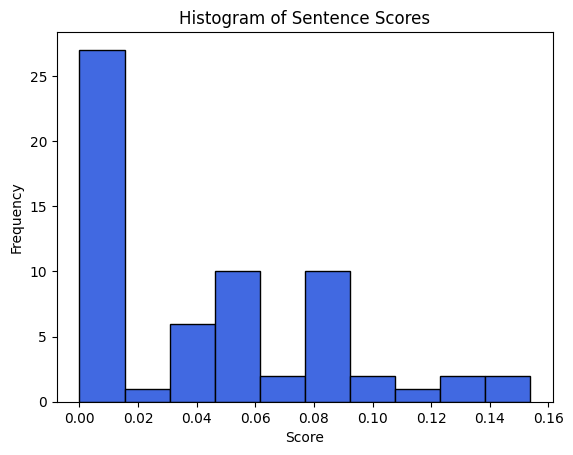

In [91]:
from article_summarizer_methods import score_sentence_by_lemma

# Empty list of scores
scores = []

# create set of interesting lemmas
interesting_lemmas = set()
for lemma, freq in top5_lemmas:
    interesting_lemmas.add(lemma)

# Calculate score for each sentence
for sentence in sentences:
    scores.append(score_sentence_by_lemma(sentence, interesting_lemmas))
    
plt.hist(scores, color='royalblue', edgecolor='black')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Scores')

# display histogram
plt.show()

# Most common range of scores:
# A score of 0 is still the most common, but there are fewer sentences scored with a 0, and quite a few 0 scores fewer overall than when scoring by token.

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [92]:
# Create Cutoff Score for tokens:
token_cutoff = 0.09

# Create Cutoff Score for lemmas:
lemma_cutoff = 0.11

# summarize based on tokens
sentences_above_cutoff = []
for sent in sentences:
    score = score_sentence_by_token(sent, interesting_tokens)

    # print(score)
    # print(token_cutoff)
    # print(score > token_cutoff)

    if score > token_cutoff:
        sentences_above_cutoff.append(sent.text.strip())
len(sentences_above_cutoff)    

token_summary = ' '.join(sentences_above_cutoff)

print(f'Article Summary by Tokens: \n{token_summary}')

Article Summary by Tokens: 
The tiny cuts — shrewdly shredded and deftly diced across the first 80 games of the season — finally killed the Blues. They dotted an inconsistent transition season that turned out to be, well, almost exactly what the Blues organization thought it might be. Blues interim coach Drew Bannister said. It’s tough when you’re in a grind and game to game means as much as it did.” Of course, this season was somewhat expected by the Blues’ management and ownership. It slugged through a season with four win streaks of at least three games, and four losing streaks of at least three games. “You can pick apart the games that we lost,” Bannister said. Across a six-month season, only two games failed to matter for the Blues, a massive trim from a season ago but still too many for a franchise with a banner just five years ago.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [93]:
# process token_summary with spaCy
doc = nlp(token_summary)

# Get the polarity score
polarity_score = doc._.polarity

# Print the polarity score
print("Polarity Score of Summary:", polarity_score)

# Count the number of sentences
num_sentences = len(list(doc.sents))

# Print the number of sentences
print("Number of Sentences in Summary:", num_sentences)

Polarity Score of Summary: 0.0006535947712418277
Number of Sentences in Summary: 8


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [94]:

# summarize based on lemmas
sentences_above_cutoff = []
for sent in sentences:
    score = score_sentence_by_lemma(sent, interesting_lemmas)

    # print(score)
    # print(lemma_cutoff)
    # print(score > lemma_cutoff)

    if score > lemma_cutoff:
        sentences_above_cutoff.append(sent.text.strip())
len(sentences_above_cutoff)    

lemma_summary = ' '.join(sentences_above_cutoff)

print(f'Article Summary by Lemma: \n{lemma_summary}')

Article Summary by Lemma: 
The tiny cuts — shrewdly shredded and deftly diced across the first 80 games of the season — finally killed the Blues. and I think it’s good looking forward, we’ve got a good group in here. Of course, this season was somewhat expected by the Blues’ management and ownership. It slugged through a season with four win streaks of at least three games, and four losing streaks of at least three games. Across a six-month season, only two games failed to matter for the Blues, a massive trim from a season ago but still too many for a franchise with a banner just five years ago.


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [95]:
# process token_summary with spaCy
doc = nlp(lemma_summary)

# Get the polarity score
polarity_score = doc._.polarity

# Print the polarity score
print("Polarity Score of Summary:", polarity_score)

# Count the number of sentences
num_sentences = len(list(doc.sents))

# Print the number of sentences
print("Number of Sentences in Summary:", num_sentences)

Polarity Score of Summary: 0.1535714285714286
Number of Sentences in Summary: 5


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity scores of the lemma summary is quite a bit higher than the original article's score.  That said, it is still quite neutral.  The summarization based on lemma scores was higher I think, because one of the interesting lemmas that was used to score sentences was the word "good", which I think would have a positive connotation.  It's likely that a sentence with a score above the threshold would also contain the word "good".  

The summary based on tokens was closer lower than the original score, very near 0.0 at 0.0006.  All of the top 5 interesting tokens that were used to score sentences were themselves very neutral.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

To me, the summary from the tokens is better.  The summary generated from lemma scores has an awkward issue with it: 

>The tiny cuts — shrewdly shredded and deftly diced across the first 80 games of the season — finally killed the Blues. <span style="color:red">and I think it’s good looking forward, we’ve got a good group in here. </span>Of course, this season was somewhat expected by the Blues’ management and ownership. It slugged through a season with four win streaks of at least three games, and four losing streaks of at least three games. Across a six-month season, only two games failed to matter for the Blues, a massive trim from a season ago but still too many for a franchise with a banner just five years ago.

That red text is a sentence fragment and it would be very strange if it was encountered by a reader.  That sentence is also part of a direct quote from one of the players: "Maybe there’s a couple we would like to have back, but at the same time, we’ve been playing some good hockey <em>and I think it’s good looking forward, we’ve got a good group in here.</em>"

The summary created by the token scoring system reads very well, and does not have any awkward voice changes:

>The tiny cuts — shrewdly shredded and deftly diced across the first 80 games of the season — finally killed the Blues. They dotted an inconsistent transition season that turned out to be, well, almost exactly what the Blues organization thought it might be. Blues interim coach Drew Bannister said. It’s tough when you’re in a grind and game to game means as much as it did.” Of course, this season was somewhat expected by the Blues’ management and ownership. It slugged through a season with four win streaks of at least three games, and four losing streaks of at least three games. “You can pick apart the games that we lost,” Bannister said. Across a six-month season, only two games failed to matter for the Blues, a massive trim from a season ago but still too many for a franchise with a banner just five years ago.

The big issue with both of these summaries, is that neither of them state the most important fact in plain English: "The Blues have been eliminated from the playoffs".  An ideal summary for this article would include this sentence: "And with a 5-2 loss to Carolina on Friday night, combined with a Vegas win over Minnesota, the Blues were officially eliminated from postseason contention."

I think that this comes down to how the interesting words are selected.  The words being the most frequent N words in an article isn't a very targetted approach to finding the <em>most important</em> words (though it does make sense that the most important words would be frequently repeated).  A more sophisticated scoring algorithm could improve things, I think.  It may make sense to give different coefficients to the scores of different parts of speech.  You could increase the coefficient for a word if it is also listed in the headline of the article.  That said, I am surprised at how good of a summary the token score summary is.

